In [1]:
#!pip install opendatasets
!pip install numpy==1.20.1

In [2]:
!pip install pandas --upgrade

In [3]:
!pip install tensorflow==2.9.1

  Using cached MarkupSafe-2.1.1-cp37-cp37m-win_amd64.whl (17 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'd:\\users\\hp\\anaconda3\\lib\\site-packages\\~arkupsafe\\_speedups.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



# Data Collection

In [4]:
import tensorflow as tf
import opendatasets as od
import pandas as pd
import numpy as np
import json
import requests
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

D:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
od.download("https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd")

Skipping, found downloaded files in ".\btcinusd" (use force=True to force download)


In [6]:
data =pd.read_csv('.\\btcinusd\\BTC-Daily.csv')

In [7]:
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


# Data Preperation

In [8]:
temp = data[data['date'].str.contains('2017')]
print(temp)

            unix                 date   symbol      open      high       low  \
1521  1514678400  2017-12-31 00:00:00  BTC/USD  12640.00  14296.06  12491.21   
1522  1514592000  2017-12-30 00:00:00  BTC/USD  14340.00  14463.28  12050.00   
1523  1514505600  2017-12-29 00:00:00  BTC/USD  14470.07  15111.00  13998.00   
1524  1514419200  2017-12-28 00:00:00  BTC/USD  15364.93  15474.19  13500.00   
1525  1514332800  2017-12-27 00:00:00  BTC/USD  15764.44  16480.52  14484.00   
...          ...                  ...      ...       ...       ...       ...   
1881  1483574400  2017-01-05 00:00:00  BTC/USD   1114.38   1136.72    885.41   
1882  1483488000  2017-01-04 00:00:00  BTC/USD   1035.51   1139.89   1028.56   
1883  1483401600  2017-01-03 00:00:00  BTC/USD   1011.44   1039.00    999.99   
1884  1483315200  2017-01-02 00:00:00  BTC/USD    997.75   1032.00    990.01   
1885  1483228800  2017-01-01 00:00:00  BTC/USD    966.34   1005.00    960.53   

         close    Volume BTC  Volume US

In [9]:
data['date'] = data['date'].astype('datetime64[ns]')

In [10]:
data = data.drop(range(1885,2651))

In [11]:
df = data

In [12]:
df = data.set_index('date')
df.sort_index(ascending=True, inplace=True)

In [13]:
df.drop(['unix','symbol'], axis=1, inplace=True)

In [14]:
df.head()

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2017-01-02,997.75,1032.00,990.01,1014.10,8190254.59,8085.06
2017-01-03,1011.44,1039.00,999.99,1036.99,8955192.92,8779.72
2017-01-04,1035.51,1139.89,1028.56,1122.56,23257162.08,21371.60
2017-01-05,1114.38,1136.72,885.41,994.02,35036904.22,34736.36
2017-01-06,1004.73,1026.99,871.00,891.56,25238781.34,27597.93


In [15]:
df.describe()

,open,high,low,close,Volume BTC,Volume USD
count,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03,1.885000e+03
mean,16275.733862,16758.529066,15721.012292,16298.122637,1.729110e+07,8.577548e+07
std,17312.689749,17803.711471,16724.808472,17320.641886,5.538429e+07,1.185873e+08
min,778.700000,823.450000,751.340000,788.810000,4.900629e+01,1.144750e+03
25%,5730.690000,5965.770000,5548.000000,5735.880000,4.079044e+03,1.468793e+07
50%,8806.850000,9020.000000,8540.940000,8812.210000,7.643850e+03,5.218044e+07
75%,17471.500000,17950.000000,16570.000000,17680.630000,2.112561e+04,1.084381e+08
max,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1885 entries, 2017-01-02 to 2022-03-01
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        1885 non-null   float64
 1   high        1885 non-null   float64
 2   low         1885 non-null   float64
 3   close       1885 non-null   float64
 4   Volume BTC  1885 non-null   float64
 5   Volume USD  1885 non-null   float64
dtypes: float64(6)
memory usage: 103.1 KB


# Data Pre-processing

In [21]:
#deleting duplicate rows
df.drop_duplicates(inplace=True)

In [17]:
# checking for missing values
df.isnull()

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2017-01-02,False,False,False,False,False,False
2017-01-03,False,False,False,False,False,False
2017-01-04,False,False,False,False,False,False
2017-01-05,False,False,False,False,False,False
2017-01-06,False,False,False,False,False,False
...,...,...,...,...,...,...
2022-02-25,False,False,False,False,False,False
2022-02-26,False,False,False,False,False,False
2022-02-27,False,False,False,False,False,False


Hence Concluding that the dataset acquired is clean



In [131]:
def train_test_split(df, test_size=0.15):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
target_col = 'close'

In [132]:
train, test = train_test_split(df, test_size=0.15)

# Data Visualization 

In [139]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=1.5):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price ', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

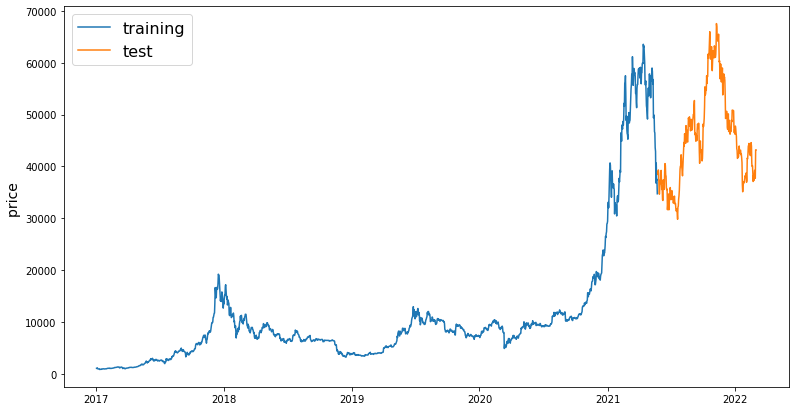

In [140]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='')